1. Install and Import Dependencies

In [1]:
!pip install easyocr
!pip install imutils



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pytesseract



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install qrcode



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install SpeechRecognition



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pyttsx3



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import imutils
import easyocr
import pytesseract
import csv
from datetime import datetime
import qrcode
import speech_recognition as sr
import pyttsx3


2. Read in Image, Grayscale and Blur

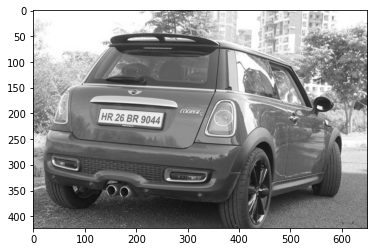

In [2]:
# reading image
img = cv2.imread('image1.jpg')
# performing grayscaling
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


3. Apply Filter and Find Edges for Localization

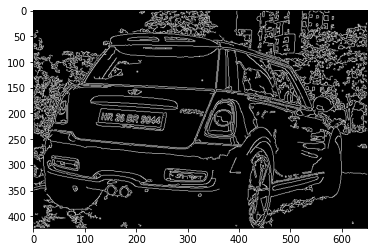

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise reduction
edged = cv2.Canny(bfilter, 30, 200)  # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


4. Find Contours and Apply Mask

In [4]:
# finding contours
keypoints = cv2.findContours(
    edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location


array([[[125, 218]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [6]:
# masking
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


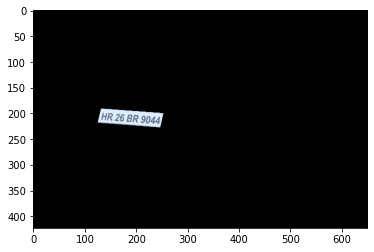

In [7]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [8]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]


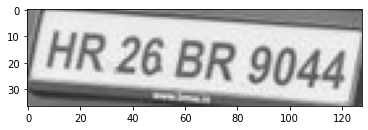

In [9]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


5. Use EasyOCR to Read Text

In [10]:
# run easyocr on image
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 4], [126, 4], [126, 34], [2, 34]], 'HR 26 BR 9044', 0.6827115385835375)]

6. Render Result

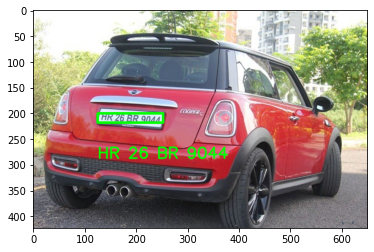

In [11]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60),
                  fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(
    approx[2][0]), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


In [12]:
result = " "
for a in text:
    if (a.isdigit() or a.isalpha()):
        result += a
result
num = str(result)
print(num)


 HR26BR9044


8. Main Menu for Automated Parking System

In [20]:
text_speech = pyttsx3.init()
rate = text_speech.getProperty("rate")
text_speech.setProperty("rate", 200)
print("Welcome to the automated parking system")
text_speech.say("Welcome to the automated parking system")
print("1. Do you want to add new record?")
text_speech.say("1. Do you want to add new record?")
print("2. Do you want to retrieve record for %s ?" % num)
text_speech.say("2. Do you want to retrieve record for %s ?" % num)
print("3. Do you want to calculate the cost of parking for %s ?" % num)
text_speech.say(
    "3. Do you want to calculate the cost of parking for %s ?" % num)
print("4. Do you want to enter the customer's preferred payment method and accept payment?")
text_speech.say(
    "4. Do you want to enter the customer's preferred payment method and accept payment?")
print("5. Do you want to retrieve record of every vehicle in the parking lot?")
text_speech.say(
    "5. Do you wish to retrieve record of every vehicle in the parking lot?")
print("Speak your desired action (first/second/third/fourth/fifth): ")
text_speech.say(
    "Speak your desired action (first/second/third/fourth/fifth): ")
text_speech.runAndWait()
r = sr.Recognizer()
with sr.Microphone() as source:
    audio = r.listen(source)
    try:
        rec = r.recognize_google(audio)
        choice = str(rec)
        print("You said: {}".format(rec))
        text_speech.say("You said: {}".format(rec))
        text_speech.runAndWait()
    except:
        print("Sorry, I didn't understand what you said.")
        text_speech.say("Sorry, I didn't understand what you said.")
        print("Manually enter your desired action (first/second/third/fourth/fifth): ")
        text_speech.say(
            "Manually enter your desired action (first/second/third/fourth/fifth): ")
        text_speech.runAndWait()
        choice = input(
            "Manually enter your desired action (first/second/third/fourth/fifth): ")
        print("You entered: ", choice)
        text_speech.say("You entered: ", choice)
        text_speech.runAndWait()


Welcome to the automated parking system
1. Do you want to add new record?
2. Do you want to retrieve record for  HR26BR9044 ?
3. Do you want to calculate the cost of parking for  HR26BR9044 ?
4. Do you want to enter the customer's preferred payment method and accept payment?
5. Do you want to retrieve record of every vehicle in the parking lot?
Speak your desired action (first/second/third/fourth/fifth): 
You said: fourth


9. Add a New Record

In [15]:
if choice == 'first':
    with open('E:\VS Code\License Plate Recognition\Database.csv', 'a') as file:
        myFile = csv.writer(file)
        text_speech = pyttsx3.init()
        rate = text_speech.getProperty("rate")
        text_speech.setProperty("rate", 200)
        LicensePlateNo = num
        print("Speak owner's name: ")
        text_speech.say("Speak owner's name: ")
        text_speech.runAndWait()
        r = sr.Recognizer()
        with sr.Microphone() as source:
            audio = r.listen(source)
            try:
                rec = r.recognize_google(audio)
                OwnersName = str(rec)
                print("You said: {}".format(OwnersName))
                text_speech.say("You said: {}".format(OwnersName))
                text_speech.runAndWait()
            except:
                print("Sorry, I didn't understand what you said.")
                text_speech.say("Sorry, I didn't understand what you said.")
                print("Manually enter owner's name: ")
                text_speech.say("Manually enter owner's name: ")
                text_speech.runAndWait()
                OwnersName = input("Manually enter owner's name: ")
                print("You entered: ", OwnersName)
                text_speech.say("You entered: ", OwnersName)
                text_speech.runAndWait()
        print("Speak vehicle class: ")
        text_speech.say("Speak vehicle class: ")
        text_speech.runAndWait()
        r = sr.Recognizer()
        with sr.Microphone() as source:
            audio = r.listen(source)
            try:
                rec = r.recognize_google(audio)
                VehicleClass = str(rec)
                print("You said: {}".format(VehicleClass))
                text_speech.say("You said: {}".format(VehicleClass))
                text_speech.runAndWait()
            except:
                print("Sorry, I didn't understand what you said.")
                text_speech.say("Sorry, I didn't understand what you said.")
                print("Manually enter vehicle class: ")
                text_speech.say("Manually enter vehicle class: ")
                text_speech.runAndWait()
                VehicleClass = input("Manually enter vehicle class: ")
                print("You entered: ", VehicleClass)
                text_speech.say("You entered: ", VehicleClass)
                text_speech.runAndWait()
        now = datetime.now()
        ParkingTime = now.strftime('%d-%m-%Y %H:%M')
        myFile.writerow([LicensePlateNo, OwnersName,
                        VehicleClass, ParkingTime])
        print("Records entered successfully.")
        text_speech.say("Records entered successfully.")
        text_speech.runAndWait()


Speak owner's name: 
You said: HD
Speak vehicle class: 
You said: private
Records entered successfully.


10. Retrieve a Record

In [17]:
#df = pd.read_csv(r'E:\VS Code\License Plate Recognition\Owner_Info.csv')
#num = str(result)
#df[df['License Plate No.'] == num]
if choice == 'second':
    csv_file = csv.reader(
        open('E:\VS Code\License Plate Recognition\Database.csv', 'r'))
    for row in csv_file:
        if row[0] == num:
            text_speech = pyttsx3.init()
            rate = text_speech.getProperty("rate")
            text_speech.setProperty("rate", 200)
            print(row)
            text_speech.say(row)
            print("Record retrieved successfully.")
            text_speech.say("Record retrieved successfully.")
            text_speech.runAndWait()


[' HR26BR9044', 'Harsh Jain', 'private', '21-08-2022 09:08']
Record retrieved successfully.


11. Calculate the Cost of Parking

In [19]:
if choice == 'third':
    csv_file = csv.reader(
        open('E:\VS Code\License Plate Recognition\Database.csv', 'r'))
    for row in csv_file:
        if num == row[0]:
            text_speech = pyttsx3.init()
            rate = text_speech.getProperty("rate")
            text_speech.setProperty("rate", 200)
            parking_time = row[3]
            vehicle_class = row[2]
            start = datetime.strptime(parking_time, '%d-%m-%Y %H:%M')
            end = datetime.now()
            diff = end - start
            diff_in_hours = diff.total_seconds() / 3600
            print("Parking Time: ", start)
            print("Current Time: ", end)
            print("Total parking duration: %.2f hours" % diff_in_hours)
            text_speech.say("Total parking duration: %.2f hours" %
                            diff_in_hours)
            text_speech.runAndWait()
            if vehicle_class == 'private' or vehicle_class == 'electric':
                if diff_in_hours < 24:
                    parking_cost = diff_in_hours*20
                else:
                    parking_cost = 600
            else:
                if diff_in_hours < 24:
                    parking_cost = diff_in_hours*25
                else:
                    parking_cost = 720
            print("Total parking cost: ₹%.2f" % parking_cost)
            text_speech.say("Total parking cost: ₹%.2f" % parking_cost)
            text_speech.runAndWait()


Parking Time:  2022-08-21 09:08:00
Current Time:  2022-08-27 09:11:14.313021
Total parking duration: 144.05 hours
Total parking cost: ₹600.00


12. Accept Payment via Cash or Scan & Pay Mode

We favour online payments. In what way would you like to pay us? (cash or online)
Sorry, I didn't understand what you said.
Manually enter payment method (cash or online): 
You entered:  online


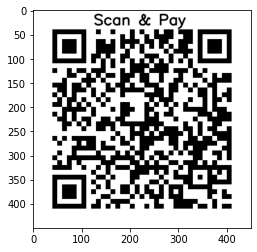

In [21]:
if choice == 'fourth':
    text_speech = pyttsx3.init()
    rate = text_speech.getProperty("rate")
    text_speech.setProperty("rate", 200)
    print("We favour online payments. In what way would you like to pay us? (cash or online)")
    text_speech.say(
        "We favour online payments. In what way would you like to pay us? (cash or online)")
    text_speech.runAndWait()
    r = sr.Recognizer()
    with sr.Microphone() as source:
        audio = r.listen(source)
        try:
            rec = r.recognize_google(audio)
            payment_method = str(rec)
            print("You said: {}".format(rec))
            text_speech.say("You said: {}".format(rec))
            text_speech.runAndWait()
        except:
            print("Sorry, I didn't understand what you said.")
            text_speech.say("Sorry, I didn't understand what you said.")
            print("Manually enter payment method (cash or online): ")
            text_speech.say("Manually enter payment method (cash or online): ")
            text_speech.runAndWait()
            payment_method = input(
                "Manually enter payment method (cash or online): ")
            print("You entered: ", payment_method)
            text_speech.say("You entered: ", payment_method)
            text_speech.runAndWait()
    if payment_method == 'online':
        upiqr = qrcode.make(
            "upi://pay?pa=hjain0894@axl&pn=Harsh%20Jain&mc=0000&mode=02&purpose=00")
        upiqr.save('upiqr.jpg')
        upiqr = cv2.imread('upiqr.jpg')
        font = cv2.FONT_HERSHEY_SIMPLEX
        upiqr = cv2.putText(upiqr, "Scan & Pay", (125, 30), font,
                            1, (0, 0, 0), 2, lineType=cv2.LINE_AA)
        plt.imshow(cv2.cvtColor(upiqr, cv2.COLOR_BGR2RGB))
        text_speech.say("Scan & Pay")
        text_speech.runAndWait()
    else:
        print("Pay ₹%.2f in cash." % parking_cost)
        text_speech.say("Pay ₹%.2f in cash." % parking_cost)
        text_speech.runAndWait()


13. Retrieve Record of Every Vehicle in the Parking Lot

In [22]:
if choice == 'fifth':
    csv_file = csv.reader(
        open('E:\VS Code\License Plate Recognition\Database.csv', 'r'))
    for row in csv_file:
        text_speech = pyttsx3.init()
        rate = text_speech.getProperty("rate")
        text_speech.setProperty("rate", 200)
        print(row)
        text_speech.say(row)
    print("Records retrieved successfully.")
    text_speech.say("Records retrieved successfully.")
    text_speech.runAndWait()


In [23]:
text_speech = pyttsx3.init()
rate = text_speech.getProperty("rate")
text_speech.setProperty("rate", 200)
print("It's great that you parked your vehicle in our parking lot.")
text_speech.say("It's great that you parked your vehicle in our parking lot.")
text_speech.runAndWait()


It's great that you parked your vehicle in our parking lot.
